In [2]:
import os
import pandas as pd
from typing import List
from scraper.Comment import Comment
from scraper.RedditJsonLoader import RedditJsonLoader
from scraper.RedditCommentSerializer import RedditCommentSerializer

In [3]:
input_path = os.getenv('INPUT_PATH', 'Dataset/output')
output_path = os.getenv('OUTPUT_PATH', 'Dataset/comments')
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
json_files = os.listdir(input_path)
csv_path = f'{output_path}/comments.csv'

# Remove the csv file if it already exists
if os.path.exists(csv_path):
    os.remove(csv_path)

In [5]:
# Flag to track if it's the first file (for header)
first_file = True

for json_file in json_files:
    qualified_json_file_name = f'{input_path}/{json_file}'
    comments: List[Comment] = RedditJsonLoader().load_comments(path=qualified_json_file_name)
    serializer = RedditCommentSerializer()
    serializer.append_to_csv(comments=comments, path=csv_path, header=first_file)
    first_file = False

In [6]:
df = pd.read_csv(csv_path)
# Sort by score 
df = df.sort_values(by='score', ascending=False)
# Remove the num_reports and report_reasons columns
df = df.drop(['num_reports', 'report_reasons'], axis=1)
print(f'Dataframe shape: {df.shape}')

# Remove rows with body as [deleted] or [removed]
df = df[df.body != '[deleted]']
df = df[df.body != '[removed]']

Dataframe shape: (5186, 9)


In [7]:
csv_path = f'{output_path}/cleaned_comments.csv'
df.to_csv(csv_path, index=False)
data = df
df.head(10)

,id,author,body,created_utc,score,parent_id,depth,ups,downs
800,mctbdw1,aRabidGerbil,A lot of the hate fat people get is because ou...,1.739574e+09,8780,t3_1ipn8fd,0,8780,0
761,mctnf0h,Pretend_Comfort_7023,I have clients who use this drug to manage the...,1.739579e+09,5144,t3_1ipn8fd,0,5144,0
855,mct9wb8,NoneOfThisMatters_XO,The hate is more toward rich people or celebri...,1.739574e+09,4898,t3_1ipn8fd,0,4898,0
2926,kdny2c6,g-a-r-n-e-t,I just wish people realized it’s not actually ...,1.702760e+09,4092,t3_18jzb6h,0,4092,0
2331,lpgva4l,EternalNY1,A friend was in the hospital recovering from a...,1.727602e+09,2748,t3_1fruy6q,0,2748,0
0,lfikltn,umlguru,"Ozempic doesn't limit hunger, that is a side e...",1.722273e+09,2303,t3_1ef49pn,0,2303,0
856,mctb9ky,eveningwindowed,And denying that they’re on it,1.739574e+09,2126,t1_mct9wb8,1,2126,0
3623,mhyuqx1,brutalcritc,Shitting all day.,1.742066e+09,2070,t3_1jc2ier,0,2070,0
801,mctt4yt,Fluffernutter80,It kind of reminds me of Dr. Seuss’s The Sneet...,1.739581e+09,1941,t1_mctbdw1,1,1941,0
3356,m6ymzku,auraseer,I'm in the ED. We have seen a bunch of people ...,1.736793e+09,1718,t3_1i0kcih,0,1718,0


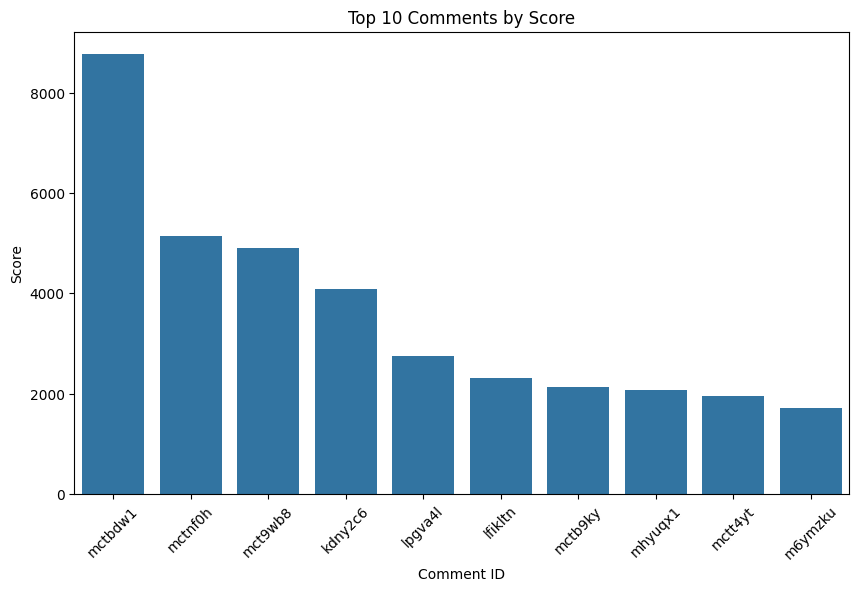

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='score', data=df.head(10))
plt.xlabel('Comment ID')
plt.ylabel('Score')
plt.title('Top 10 Comments by Score')
plt.xticks(rotation=45)
plt.show()

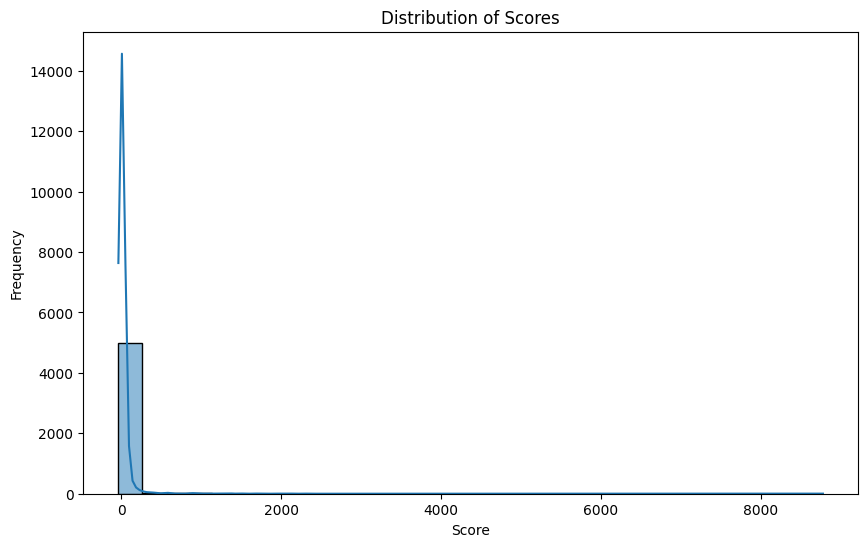

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=30, kde=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

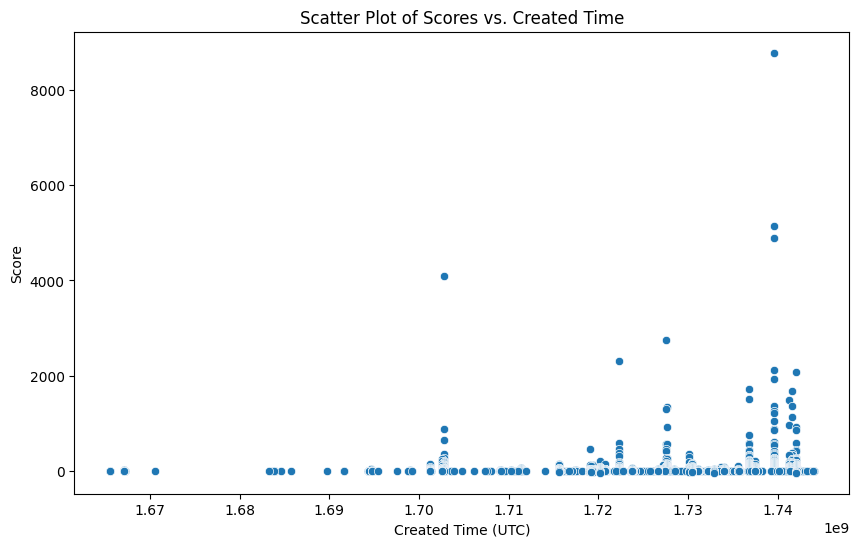

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='created_utc', y='score', data=df)
plt.xlabel('Created Time (UTC)')
plt.ylabel('Score')
plt.title('Scatter Plot of Scores vs. Created Time')
plt.show()